In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [46]:
y0 = 16631
v0 = 60714
k = 4.17

def OD(raw, blank, y0=y0, k=k, v0=v0):
    return  (-1 / k) * np.log(1 - (blank - raw) * k / v0)

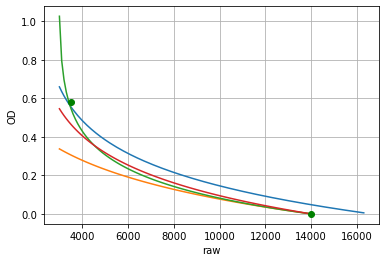

In [63]:
plt.plot((r:=np.arange(3000, 16400,100)), OD(r, blank=y0))
plt.plot((r:=np.arange(3000, 14000,100)), OD(r, blank=14000,))
plt.plot((r:=np.arange(3000, 14000,100)), OD(r, blank=14000, k=5.5))
plt.plot((r:=np.arange(3000, 14000,100)), OD(r, blank=14000, v0=v0 * 14000 / y0))
plt.plot([14000, 3500], [0, .58], 'go')

plt.xlabel('raw')
plt.ylabel('OD')
plt.grid()
plt.show()

In [29]:
r=np.arange(1000, 1600,100)
OD(r, y0)

<ipython-input-19-d215d5c24428>:7: RuntimeWarning: invalid value encountered in log
  return (blank / clear ) * (-1 / k) * np.log(1 - (blank - raw) * k / v0)


array([nan, nan, nan, nan, nan, nan])

In [32]:
y0 - v0 /k 

2071.2877697841723

In [30]:
OD(6800, 16631)

0.2696895368100192

In [36]:
OD(3500, 14000)

0.25781858945752417

In [66]:
table = pd.read_csv('/home/aaristov/Multicell/Andrey/data/20210910-chi.bio-growth-rate/2021-04-14 12_50_25_M0_data.csv')

In [68]:
table.loc[:, "h"] = table.exp_time / 3600

In [71]:
table.columns

Index(['exp_time', 'od_raw', 'od_measured', 'od_setpoint', 'od_zero_setpoint',
       'thermostat_setpoint', 'heating_rate', 'internal_air_temp',
       'external_air_temp', 'media_temp', 'opt_gen_act_int', 'pump_1_rate',
       'pump_2_rate', 'pump_3_rate', 'pump_4_rate', 'media_vol',
       'stirring_rate', 'LED_395nm_setpoint', 'LED_457nm_setpoint',
       'LED_500nm_setpoint', 'LED_523nm_setpoint', 'LED_595nm_setpoint',
       'LED_623nm_setpoint', 'LED_6500K_setpoint', 'laser_setpoint',
       'LED_UV_int', 'FP1_base', 'FP1_emit1', 'FP1_emit2', 'FP2_base',
       'FP2_emit1', 'FP2_emit2', 'FP3_base', 'FP3_emit1', 'FP3_emit2',
       'custom_prog_param1', 'custom_prog_param2', 'custom_prog_param3',
       'custom_prog_status', 'zigzag_target', 'growth_rate', 'h'],
      dtype='object')

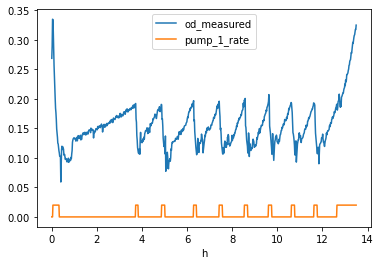

In [104]:
table.query('h<13.5').plot(x='h', y=['od_measured', 'pump_1_rate'])

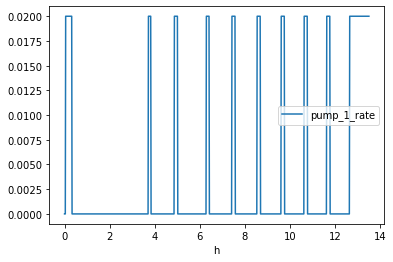

In [80]:
table.query('h<13.5').plot(x='h', y='pump_1_rate')

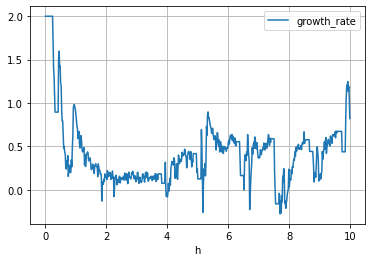

In [78]:
table.query('h<10').plot(x='h', y='growth_rate')
plt.grid()

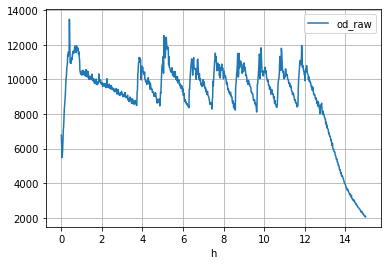

In [91]:
table.query('h<15').plot(x='h', y='od_raw')
plt.grid()

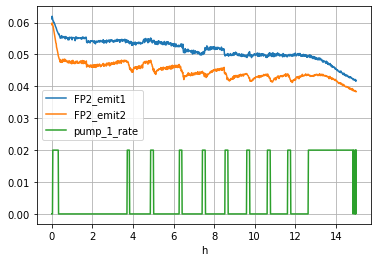

In [89]:
table.query('h<15').plot(x='h', y=['FP2_emit1', 'FP2_emit2','pump_1_rate'])
plt.grid()

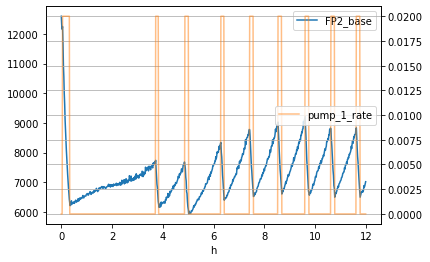

In [103]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
table.query('h<12').plot(x='h', y=['FP2_base',], ax=ax)
table.query('h<12').plot(x='h', y=['pump_1_rate',], ax=ax2, color='tab:orange', alpha=0.5)

plt.grid()

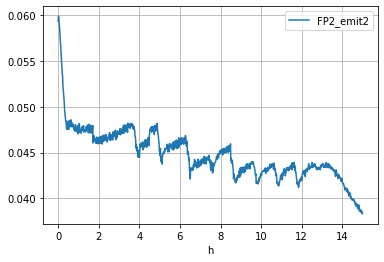

In [98]:
table.loc[:, "FP2_norm"] = table.FP2_base / table.od_measured
table.query('h<15').plot(x='h', y=['FP2_emit2'])
plt.grid()